## Liver Faliure (Hepatitis C) - Prediction.

Hepatitis C

An infection caused by a virus that attacks the liver and leads to inflammation.

The virus is spread by contact with contaminated blood; for example, from sharing needles or from unsterile tattoo equipment.
Most people have no symptoms. Those who do develop symptoms may have fatigue, nausea, loss of appetite and yellowing of the eyes and skin

Data set url : http://archive.ics.uci.edu/ml/datasets/HCV+data

GitHub Repo Of this Analysis and Dataset in case of any faliure: 
https://github.com/toshihiroryuu/Machine_learning/tree/master/ML_004_Hepatitis

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis)

## Attribute Information:

14 attributes - Data set from UCI (UNIVERSITY OF CALIFORNIA)- Irwin Machine Learning Reository

All attributes except Category and Sex are numerical. The laboratory data are the attributes 5-14.

Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

X (Patient ID/No., 
Age - age (in years), 
Sex - male or female(f,m), 
ALB - Albumin, 
ALP - Alkaline phosphatase, 
ALT - Alanine transaminase, 
AST - Aspartate aminotransferase, 
BIL - Bilirubin, 
CHE - cholinesterase, 
CHOL - Cholesterol, 
CREA - Creatine, 
GGT - Gamma-glutamyl transferase, 
PROT - Protien in urine, 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno
# ! pip install missingno

url = "https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/hcv.csv?token=ALRYHUDW5YYDYJDGFGNI6LS7VZWES"
# read hepatitis data set. 
df = pd.read_csv(url)

df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [2]:
# identify the size of data frame
print("Size of the data frame is",df.size)

# identify the shape of the data frame 
print("Shape of the data frame is",df.shape)
print("No of Rows = ", df.shape[0])
print("No of Columns = ", df.shape[1])
  
# identify the number of dimensions of your df
print("Dimentions(axis) of the data frame is",df.ndim)

df.describe()

Size of the data frame is 8610
Shape of the data frame is (615, 14)
No of Rows =  615
No of Columns =  14
Dimentions(axis) of the data frame is 2


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


## Preprocessing
Change Category values

In [3]:
# Replace Category with meaning full entries.
df['Category'] = df['Category'].replace(['0=Blood Donor'],'Blood Donor')
df['Category'] = df['Category'].replace(['0s=suspect Blood Donor'],'Suspect Blood Donor')
df['Category'] = df['Category'].replace(['1=Hepatitis'],'Hepatitis')
df['Category'] = df['Category'].replace(['2=Fibrosis'],'Fibrosis')
df['Category'] = df['Category'].replace(['3=Cirrhosis'],'Cirrhosis')

df = df.drop(['Unnamed: 0'], axis=1)

df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


## Preprocessing
Change labels to categorical values

Replace male, female (Sex) to categorical values.
Male(m) to 1, Female(f) to 0

In [4]:
df['Sex'] = np.where(df['Sex'] == 'f', 0, 1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,Cirrhosis,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,Cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Encode Category to 0, 1, 2, 3, 4

In [5]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["category"] = lb_make.fit_transform(df["Category"])

# 0 - Blood donor
# 1 - Cirrhosis
# 2 - Fibrosis
# 3 - Hepatits
# 4 - Suspect Blood Donor

df[df["category"] == 2].head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
564,Fibrosis,29,1,41.0,43.1,2.4,83.5,6.0,11.49,5.42,55.2,130.0,66.5,2
565,Fibrosis,40,1,39.0,43.1,23.8,114.7,11.0,9.64,4.20,70.9,127.3,81.3,2
566,Fibrosis,46,1,45.0,26.9,23.1,125.0,17.0,6.97,4.01,60.5,72.2,73.0,2
567,Fibrosis,48,1,49.0,45.2,19.3,69.1,30.0,7.76,4.22,76.7,28.4,72.3,2
568,Fibrosis,49,1,39.0,NaN,118.0,62.0,10.0,7.28,3.50,72.0,74.0,81.0,2


## Handle outliers using Scatter plots

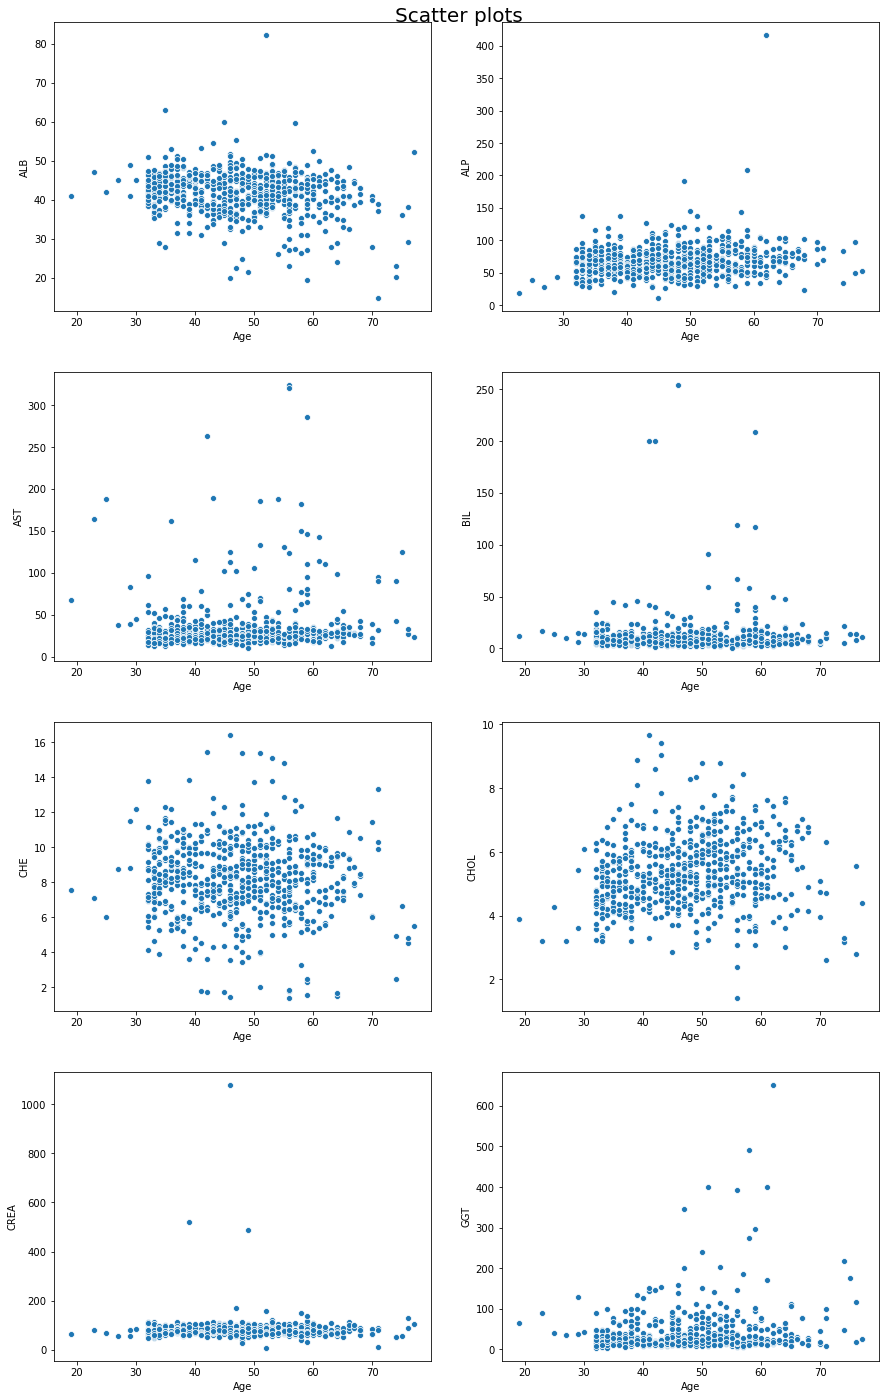

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4,2,figsize=(13,20))
plt.suptitle('Scatter plots', fontsize=20)
plt.tight_layout(4)

sns.scatterplot(data=df, x='Age', y='ALB',ax=ax[0][0])
sns.scatterplot(data=df, x='Age', y='ALP',ax=ax[0][1])
sns.scatterplot(data=df, x='Age', y='AST', ax=ax[1][0])
sns.scatterplot(data=df, x='Age', y='BIL', ax=ax[1][1])
sns.scatterplot(data=df, x='Age', y='CHE', ax=ax[2][0])
sns.scatterplot(data=df, x='Age', y='CHOL', ax=ax[2][1])
sns.scatterplot(data=df, x='Age', y='CREA', ax=ax[3][0])
sns.scatterplot(data=df, x='Age', y='GGT', ax=ax[3][1])

plt.show()

In [7]:
print("ALBUMIN")
df_out = df[df['ALB'] > 80]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['ALB'] > 80)]

print("ALP")
df_out = df[df['ALP'] > 250]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['ALP'] > 250)]

print("AST")
df_out = df[df['AST'] > 200]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['AST'] > 200)]

print("Bilirumin -BIL")
df_out = df[df['BIL'] > 100]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['BIL'] > 100)]

print("Creatine -CREA")
df_out = df[df['CREA'] > 400]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['CREA'] > 400)]

print("GGT")
df_out = df[df['GGT'] > 300]
print("No of rows to be dropped", df_out.shape[0])
df = df[~(df['GGT'] > 300)]

print("Shape of the dataset after removing outliers", df.shape)

df

ALBUMIN
No of rows to be dropped 1
ALP
No of rows to be dropped 1
AST
No of rows to be dropped 4
Bilirumin -BIL
No of rows to be dropped 6
Creatine -CREA
No of rows to be dropped 3
GGT
No of rows to be dropped 4
Shape of the dataset after removing outliers (596, 14)


,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
0,Blood Donor,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,Blood Donor,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,Blood Donor,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,Blood Donor,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,Blood Donor,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,Cirrhosis,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,1
611,Cirrhosis,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,Cirrhosis,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,Cirrhosis,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1


## Handle missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  596 non-null    object 
 1   Age       596 non-null    int64  
 2   Sex       596 non-null    int32  
 3   ALB       595 non-null    float64
 4   ALP       579 non-null    float64
 5   ALT       595 non-null    float64
 6   AST       596 non-null    float64
 7   BIL       596 non-null    float64
 8   CHE       596 non-null    float64
 9   CHOL      587 non-null    float64
 10  CREA      596 non-null    float64
 11  GGT       596 non-null    float64
 12  PROT      596 non-null    float64
 13  category  596 non-null    int32  
dtypes: float64(10), int32(2), int64(1), object(1)
memory usage: 65.2+ KB


Total number of rows in this dataset is 596 after outlier removal.

In [9]:
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 28


In [10]:
# Get rows where the data is missing
null_data = df[df.isnull().any(axis=1)]
null_data

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
121,Blood Donor,43,1,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0,0
319,Blood Donor,32,0,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2,0
329,Blood Donor,33,0,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4,0
413,Blood Donor,46,0,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9,0
424,Blood Donor,48,0,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1,0
433,Blood Donor,48,0,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4,0
498,Blood Donor,57,0,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8,0
540,Hepatitis,38,1,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0,3
541,Hepatitis,19,1,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0,3
545,Hepatitis,29,1,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0,3


Plot bar graph to visualise the per column missing values.
We are using missingno library for this. Use pip install missingno if module not installed.

AxesSubplot(0.125,0.125;0.775x0.755)


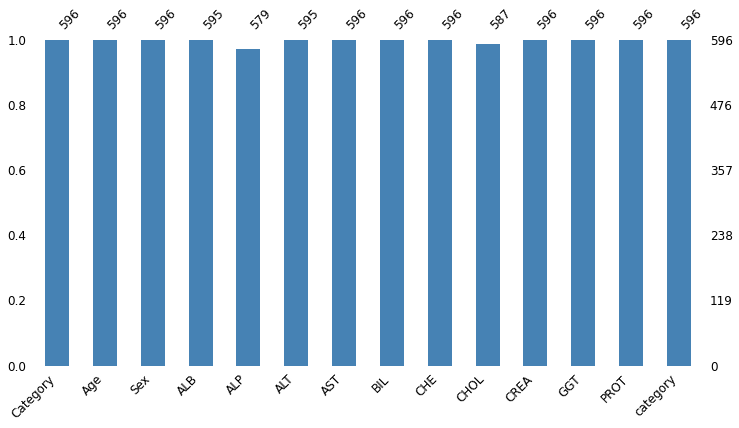

In [11]:
missing_bar  = msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

print(missing_bar)

Find the correlation between data to determine suitable method to handle missing data.

AxesSubplot(0.125,0.125;0.62x0.755)


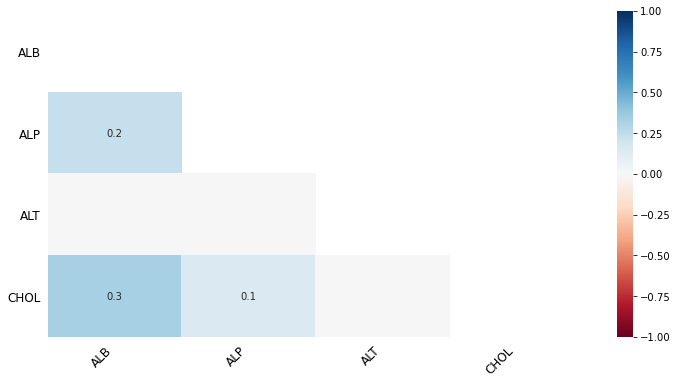

In [12]:
print(msno.heatmap(df, figsize=(12, 6), fontsize=12))

We can either drop the corresponding columns or replace it with mean.

In [13]:
# Compute mean with and without mean replacement of missing data.
df['ALP'].mean(), df['ALP'].fillna(df['ALP'].mean()).mean()

(66.93575129533683, 66.9357512953368)

In [14]:
df['CHOL'].mean(), df['CHOL'].fillna(df['CHOL'].mean()).mean()

(5.399522998296421, 5.399522998296423)

In [15]:
df['ALB'].mean(), df['ALB'].fillna(df['ALB'].mean()).mean()

(41.82201680672269, 41.82201680672269)

In [16]:
df['ALT'].mean(), df['ALT'].fillna(df['ALT'].mean()).mean()

(28.754453781512584, 28.75445378151258)

In [17]:
df['PROT'].mean(), df['PROT'].fillna(df['PROT'].mean()).mean()

(72.1986577181209, 72.1986577181209)

Mean computed before and after replacing null values with mean differ minutely.
Therefore missing values are replaced with corresponding mean.

In [18]:
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
                  
miss_count = df.isnull().sum().sum()

print("No of missing values is",miss_count)

No of missing values is 0


## Dummy variables

In [19]:
# We have 5 labels inside category like hepatitis, fibrosis..etc
# One hot encoding
df_new = pd.get_dummies(df.Category)

df_new

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
608,0,1,0,0,0
611,0,1,0,0,0
612,0,1,0,0,0
613,0,1,0,0,0


In [20]:
#Concat new rows with original data frame.
df = pd.concat([df_new, df], axis=1)
# Drop category after one hot encoding.
df = df.drop(['Category'], axis=1)

In [21]:
df.tail()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
608,0,1,0,0,0,58,0,34.0,46.400000,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6,1
611,0,1,0,0,0,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1
612,0,1,0,0,0,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1
613,0,1,0,0,0,46,0,33.0,66.935751,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1
614,0,1,0,0,0,59,0,36.0,66.935751,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 614
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Blood Donor          596 non-null    uint8  
 1   Cirrhosis            596 non-null    uint8  
 2   Fibrosis             596 non-null    uint8  
 3   Hepatitis            596 non-null    uint8  
 4   Suspect Blood Donor  596 non-null    uint8  
 5   Age                  596 non-null    int64  
 6   Sex                  596 non-null    int32  
 7   ALB                  596 non-null    float64
 8   ALP                  596 non-null    float64
 9   ALT                  596 non-null    float64
 10  AST                  596 non-null    float64
 11  BIL                  596 non-null    float64
 12  CHE                  596 non-null    float64
 13  CHOL                 596 non-null    float64
 14  CREA                 596 non-null    float64
 15  GGT                  596 non-null    flo

In [23]:
df.describe()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,0.892617,0.025168,0.035235,0.036913,0.010067,47.273490,0.607383,41.822017,66.935751,28.754454,31.993121,9.382383,8.324094,5.399523,77.946477,34.234564,72.198658,0.246644
std,0.309859,0.156766,0.184528,0.188706,0.099913,10.102202,0.488743,5.309456,20.511936,25.522502,23.637838,7.818905,2.078226,1.107767,15.459053,34.303697,5.283295,0.774318
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,14.900000,11.300000,1.300000,10.600000,0.800000,1.540000,2.400000,8.000000,4.500000,44.800000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,39.000000,52.850000,16.600000,21.500000,5.200000,7.010000,4.640000,67.000000,15.600000,69.600000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,42.000000,66.300000,23.050000,25.700000,7.100000,8.325000,5.315000,76.450000,22.900000,72.300000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,45.300000,78.300000,33.100000,31.925000,10.925000,9.632500,6.060000,88.000000,37.075000,75.400000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,1.000000,62.900000,208.200000,325.300000,188.700000,91.000000,16.410000,9.670000,158.200000,295.600000,90.000000,4.000000


In [24]:
df.to_csv("processed_unscaled_data")

## Data scaling

In [25]:
from sklearn import preprocessing

cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

scaler = preprocessing.MaxAbsScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.StandardScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

df = scaleColumns(df, cols_to_scale)

df.describe()

,Blood Donor,Cirrhosis,Fibrosis,Hepatitis,Suspect Blood Donor,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,category
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,596.000000
mean,0.892617,0.025168,0.035235,0.036913,0.010067,47.273490,0.607383,0.666591,0.322039,0.088802,0.164565,0.100612,0.509983,0.560510,0.492583,0.112336,0.801897,0.246644
std,0.309859,0.156766,0.184528,0.188706,0.099913,10.102202,0.488743,0.082857,0.097297,0.078305,0.114934,0.080498,0.124307,0.114034,0.095128,0.108863,0.056721,0.774318
min,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.236884,0.054275,0.006456,0.063593,0.008791,0.093845,0.248190,0.050569,0.015223,0.522222,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.621622,0.254563,0.051952,0.113408,0.057143,0.430225,0.480869,0.429836,0.052097,0.773333,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,1.000000,0.669316,0.318924,0.071011,0.135665,0.078022,0.510055,0.553257,0.486726,0.076793,0.803333,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,0.720191,0.377522,0.101752,0.167992,0.118681,0.588056,0.628749,0.556258,0.122124,0.837778,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.802781,1.000000,1.000000,4.000000


## Data visualisation

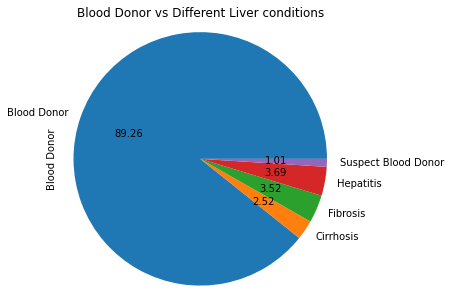

In [26]:
df_cat = df.groupby('category').count()

# find the percentages in the pie plot
import matplotlib.pyplot as plt

labels = ['Blood Donor', 'Cirrhosis', 'Fibrosis', 'Hepatitis', 'Suspect Blood Donor']

df_cat['Blood Donor'].plot(kind='pie', labels=labels, subplots=True, figsize=(5, 5), autopct='%.2f')



plt.title('Blood Donor vs Different Liver conditions')
plt.axis('equal')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


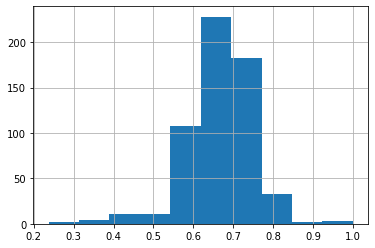

In [27]:
import matplotlib.pyplot as plt

print(df.ALB.hist())

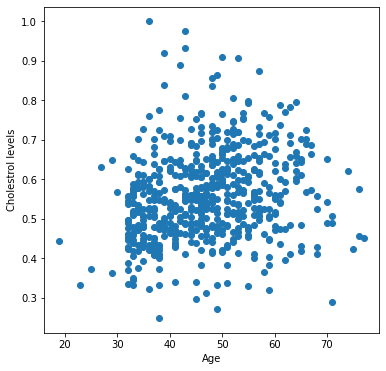

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['Age'], df['CHOL'])
ax.set_xlabel('Age')
ax.set_ylabel('Cholestrol levels')
plt.show()

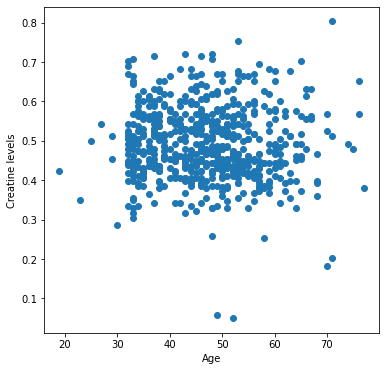

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['Age'], df['CREA'])
ax.set_xlabel('Age')
ax.set_ylabel('Creatine levels')
plt.show()

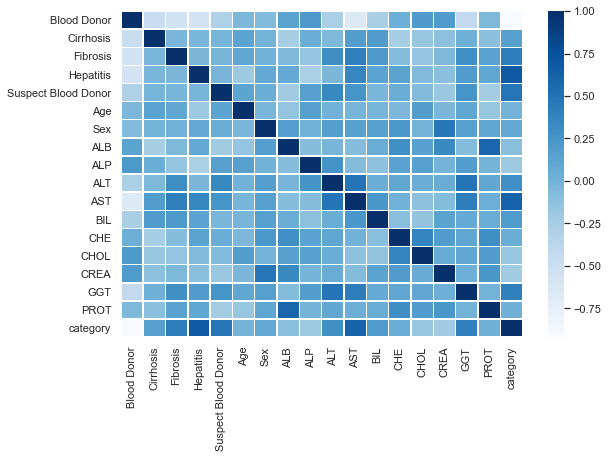

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap to Invertigate Correlation in Data
sns.set()
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap='Blues')
plt.show()

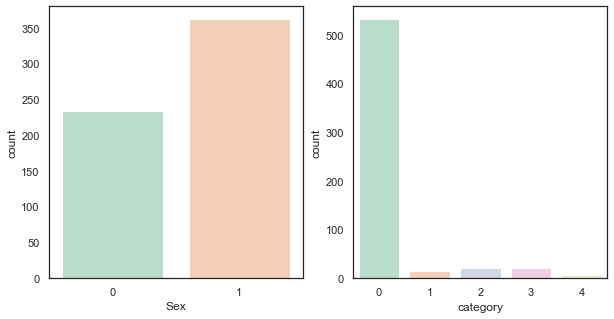

In [31]:
# Countplot for Binary Features
sns.set_style('white') 
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.countplot(df['Sex'], palette='Pastel2', ax=ax[0])
sns.countplot(df['category'], palette='Pastel2', ax=ax[1])

plt.show()

## Part : 2

The data set has been preprocessed and saved as csv file for convinience. This processed data set can be found at below url.

Processed data set URL : https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv

### Visualisation using Power Bi and  Tableau

Power Bi : https://app.powerbi.com/groups/me/reports/a77111c3-b9cb-4d53-a7c4-72a64d21fbea/ReportSectionb6f4bcc3ec64ad39500a?bookmarkGuid=567c6dd7-d4be-43b5-b458-4e4238535ad4

Tableau Online : https://public.tableau.com/views/Liver-Faliure/Summary?:language=en&:display_count=y&:origin=viz_share_link

Above Tableau DashBoard embedded on Website : http://www.athulmathew.com/liverfaliure.html

We can see that the distribution of ALP(Alkaline phosphatase) is different for people with fibrosis compared to rest of the population from the Tableau Dashboard. So lets inspect this behaviour.

### Hypothesis testing

In [32]:
import pandas as pd

# Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

In [33]:
fibrosis_and_alp = df[['Fibrosis','ALP']]
fibrosis_and_alp.head(5)

,Fibrosis,ALP
0,0,52.5
1,0,70.3
2,0,74.7
3,0,52.0
4,0,74.1


In [34]:
#ALP levels of patients with Fibrosis.
fibrosis = fibrosis_and_alp['ALP'] [fibrosis_and_alp['Fibrosis'] == True]
fibrosis.tail(5)

576    22.900000
577    66.935751
578    66.935751
579    66.935751
580    66.935751
Name: ALP, dtype: float64

In [35]:
#ALP levels of people without Fibrosis.
non_fibrosis = fibrosis_and_alp['ALP'] [fibrosis_and_alp['Fibrosis'] == False]
non_fibrosis.head()

0    52.5
1    70.3
2    74.7
3    52.0
4    74.1
Name: ALP, dtype: float64

Text(0, 0.5, 'ALP Levels')

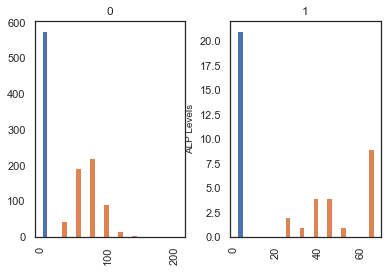

In [36]:
import matplotlib.pyplot as plt

# Distibution of ALP for people with and without Fibrosis.
fibrosis_and_alp.hist(by ='Fibrosis')
plt.ylabel('ALP Levels',fontsize=10)

ALP levels for people with fibrosis tend to be in between 20 and 60. The ALP levels of rest lies between 20 and 150.
This difference in ALP distribution could be due to chance. Lets find out. 

In [37]:
means_df = fibrosis_and_alp.groupby('Fibrosis').mean()
means_df

,ALP
Fibrosis,
0,67.542932
1,50.310560


In [38]:
observed_difference = means_df['ALP'][1] - means_df['ALP'][0]
observed_difference

-17.23237211298128

The observed value of the test statistic is -17.23 . Which favours Alternate Hypothesis.

#### ONE SIMULATION

In [39]:
fibrosis_and_alp = df[['Fibrosis', 'ALP']]
shuffled = fibrosis_and_alp.sample(596,replace = False)
shuffled_weights = shuffled['ALP']
original_and_shuffled = fibrosis_and_alp.assign(shuffled_weights=shuffled_weights.values )
all_group_means= original_and_shuffled.groupby('Fibrosis').mean()
difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
difference

-2.565883607419096

#### PERMUTATION TEST

In [40]:
import numpy as np
import array

differences = np.zeros(5000)

for i in np.arange(5000):
    fibrosis_and_alp = df[['Fibrosis', 'ALP']]
    shuffled = fibrosis_and_alp.sample(596, replace = False)
    shuffled_weights = shuffled['ALP']
    original_and_shuffled = fibrosis_and_alp.assign(shuffled_weights = shuffled_weights.values )
    all_group_means = original_and_shuffled.groupby('Fibrosis').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

In [41]:
differences_df = pd.DataFrame(differences)
differences_df.head(5)

,0
0,-0.362744
1,-10.130728
2,-8.398256
3,1.792444
4,0.071608


Observed Difference: -17.23237211298128


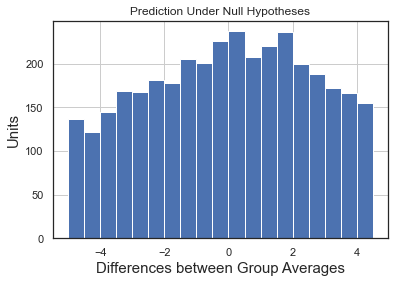

In [42]:
import matplotlib.pyplot as plt

differences_df.hist(bins = np.arange(-5, 5, 0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages', fontsize = 15)
plt.ylabel('Units', fontsize = 15);
print('Observed Difference:', observed_difference)

In [43]:
# Empirical P-Value
np.count_nonzero(differences <= observed_difference)/differences.size

0.0002

The empirical P-value is approximately  0, 
meaning that none of the 5,000 observed samples resulted in a difference of -17.23 units or lower. 
That is, the exact chance of getting a difference in that range is not 0 but it is vanishingly small.

### Student T-test

In [44]:
ages = df['Age']
len(ages)

596

In [45]:
import statistics

print("Mean Age of Sample is :", statistics.mean(ages)) 

Mean Age of Sample is : 47.27348993288591


In [46]:
import numpy as np

sample_size = 10
age_sample = np.random.choice(ages, sample_size)
age_sample

array([54, 50, 39, 50, 45, 38, 45, 60, 48, 59], dtype=int64)

In [47]:
from scipy.stats import ttest_1samp

ttest, p_value = ttest_1samp(age_sample, statistics.mean(ages))
p_value

0.5340251503249411

In [48]:
if p_value < 0.05:    # Alpha value is 0.05 or 5%
    print(" Rejecting Null hypothesis")
else:
    print("Accepting Null hypothesis")

Accepting Null hypothesis


### Classification Models

#### 1. Naive Bayes - Classification (Model1 - Manual)

In [49]:
import pandas as pd

# Read csv file
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, random_state=52)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (476, 12)
Shape of X_test: (120, 12)
Shape of Y_train: (476,)
Shape of Y_test: (120,)


In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelnb1 = GaussianNB()
modelnb1.fit(X_train, Y_train)

Y_pred = modelnb1.predict(X_test)
Y_pred[:10]

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0], dtype=int64)

#### Accuracy

In [52]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

89.17

In [53]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       107
           1       0.75      1.00      0.86         3
           2       0.22      0.50      0.31         4
           3       0.50      0.60      0.55         5
           4       0.00      0.00      0.00         1

    accuracy                           0.89       120
   macro avg       0.49      0.61      0.53       120
weighted avg       0.92      0.89      0.90       120



C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\athul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Confusion Matrix

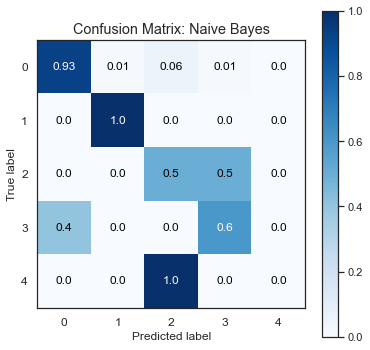

In [54]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                title='Confusion Matrix: Naive Bayes',
                                normalize=True,
                                cmap='Blues')

#### 10 Fold cross validation

In [55]:
from sklearn.model_selection import KFold
import numpy as np

scores = []
best_nb = GaussianNB()

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

cv = KFold(n_splits = 10,  shuffle = False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    
    best_nb.fit(X_train, Y_train)
    scores.append(best_nb.score(X_test, Y_test))

Train Index:  [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 

In [56]:
best_nb.fit(X_train, Y_train)
scores.append(best_nb.score(X_test, Y_test))
scores

[0.9333333333333333,
 0.8666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9661016949152542,
 0.864406779661017,
 0.0,
 0.0]

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_nb, X_test, Y_test, cv=10)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.16666667, 0.5       , 0.66666667, 0.66666667, 0.66666667,
       0.83333333, 0.66666667, 0.66666667, 0.66666667, 0.4       ])

Cross validation score is really less. The least populated class has less number of members than 10.

We have find some method to balance this class imbalance in the data set.

#### 1. Naive Bayes - Classification (Model2 - using SMOTE)

SMOTE - Synthetic Minority Oversampling Technique. 
This is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [58]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

In [59]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (2128, 12)
Shape of X_test: (532, 12)
Shape of Y_train: (2128,)
Shape of Y_test: (532,)


In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

modelnb2 = GaussianNB()
modelnb2.fit(X_train, Y_train)

GaussianNB()

In [61]:
Y_pred = modelnb2.predict(X_test)
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

87.78

In [62]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       106
           1       0.98      0.88      0.93       106
           2       0.76      0.76      0.76       106
           3       0.77      0.85      0.81       107
           4       1.00      1.00      1.00       107

    accuracy                           0.88       532
   macro avg       0.88      0.88      0.88       532
weighted avg       0.88      0.88      0.88       532



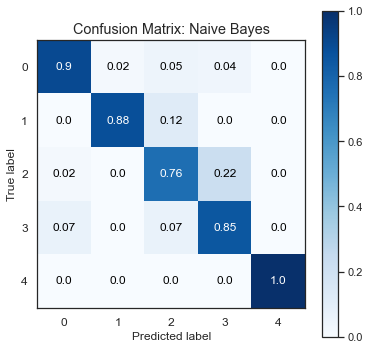

In [63]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                title='Confusion Matrix: Naive Bayes',
                                normalize=True,
                                cmap='Blues')

All True positive rates are aboce 75%. This is a good model with 88% Accuracy.

#### 2. Decision Tree Classifier (Model1 - Manual)

In [64]:
from sklearn.tree import DecisionTreeClassifier

modeldt1 = DecisionTreeClassifier()
modeldt1.fit(X_train, Y_train)

DecisionTreeClassifier()

Y_pred = modeldt1.predict(X_test)

In [65]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

96.8

In [66]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       106
           1       0.97      1.00      0.99       106
           2       0.97      0.92      0.95       106
           3       0.91      0.98      0.95       107
           4       0.99      1.00      1.00       107

    accuracy                           0.97       532
   macro avg       0.97      0.97      0.97       532
weighted avg       0.97      0.97      0.97       532



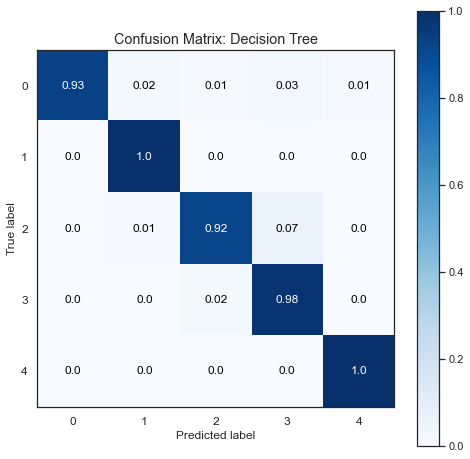

In [67]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=True,
                                    cmap='Blues')

plt.show()

#### 2. Decision Tree Classifier (Model2 - GridSearchCV)

In [68]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

min_samples_leaf = [0.10, 0.2, 0.3, 0.4, 0.5]
min_samples_split = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

dec_tree = tree.DecisionTreeClassifier()

In [69]:
parameters = dict(dec_tree__criterion=criterion,
                dec_tree__max_depth=max_depth,
                dec_tree__min_samples_leaf = min_samples_leaf,
                dec_tree__min_samples_split = min_samples_split)

In [70]:
pipe = Pipeline(steps=[('dec_tree', dec_tree)])

In [71]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_smote, Y_smote)

GridSearchCV(estimator=Pipeline(steps=[('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'dec_tree__min_samples_leaf': [0.1, 0.2, 0.3, 0.4,
                                                        0.5],
                         'dec_tree__min_samples_split': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9]})

In [72]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])


print('min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])
print('min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print()
print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 6
min_samples_leaf: 0.1
min_samples_split: 0.1

DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1, min_samples_split=0.1)


In [73]:
from sklearn.tree import DecisionTreeClassifier

modeldt2 = DecisionTreeClassifier()
modeldt2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion="gini", 
                       max_depth=6, min_samples_leaf=0.1,
                       min_samples_split=0.1)

Y_pred = modeldt2.predict(X_test)

In [74]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

96.99

In [75]:
from sklearn.metrics import classification_report 

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       106
           1       0.98      1.00      0.99       106
           2       0.94      0.94      0.94       106
           3       0.94      0.99      0.96       107
           4       1.00      1.00      1.00       107

    accuracy                           0.97       532
   macro avg       0.97      0.97      0.97       532
weighted avg       0.97      0.97      0.97       532



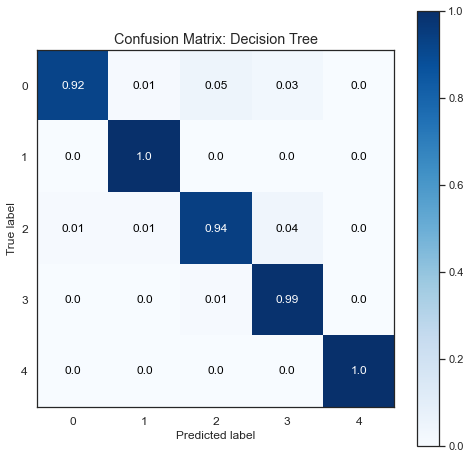

In [76]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=True,
                                    cmap='Blues')

plt.show()

All True positive rates are aboce 90%. This is a good model with 98% Accuracy. This model is better than the Naive Bayes model.

In [77]:
from sklearn import tree

text_rep = tree.export_text(modeldt2, feature_names=['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'])
print(text_rep)

|--- PROT <= 56.86
|   |--- Age <= 41.00
|   |   |--- class: 0
|   |--- Age >  41.00
|   |   |--- ALP <= 52.55
|   |   |   |--- Age <= 57.00
|   |   |   |   |--- class: 4
|   |   |   |--- Age >  57.00
|   |   |   |   |--- class: 0
|   |   |--- ALP >  52.55
|   |   |   |--- class: 4
|--- PROT >  56.86
|   |--- AST <= 31.33
|   |   |--- ALP <= 34.23
|   |   |   |--- PROT <= 72.15
|   |   |   |   |--- class: 0
|   |   |   |--- PROT >  72.15
|   |   |   |   |--- class: 3
|   |   |--- ALP >  34.23
|   |   |   |--- ALT <= 4.59
|   |   |   |   |--- class: 1
|   |   |   |--- ALT >  4.59
|   |   |   |   |--- class: 0
|   |--- AST >  31.33
|   |   |--- CHE <= 6.29
|   |   |   |--- ALT <= 134.17
|   |   |   |   |--- BIL <= 7.65
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BIL >  7.65
|   |   |   |   |   |--- AST <= 184.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- AST >  184.75
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- ALT >  134.17
|   |   |   |   |--- 

#### 3. KNN Classifier (Model1)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[:10]

array([1, 2, 0, 0, 0, 1, 2, 4, 2, 1], dtype=int64)

In [79]:
acc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc

98.31

In [80]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       106
           1       0.97      1.00      0.99       106
           2       0.98      0.98      0.98       106
           3       0.96      0.99      0.98       107
           4       1.00      1.00      1.00       107

    accuracy                           0.98       532
   macro avg       0.98      0.98      0.98       532
weighted avg       0.98      0.98      0.98       532



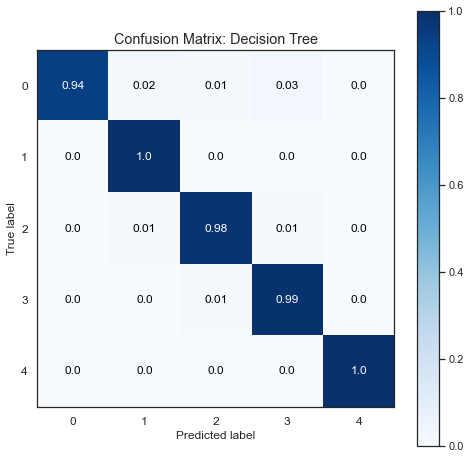

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(8,8), 
                                    title='Confusion Matrix: Decision Tree',
                                    normalize=True,
                                    cmap='Blues')

#### 10 Fold Cross Validation - KNN

In [82]:
from sklearn.model_selection import KFold
import numpy as np

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

In [84]:
scores = []
best_knn = KNeighborsClassifier(n_neighbors=5)

cv = KFold(n_splits=10,  shuffle=False)
for train_index, test_index in cv.split(X_smote):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X_smote[train_index], X_smote[test_index], Y_smote[train_index], Y_smote[test_index]
    best_knn.fit(X_train, Y_train)
    scores.append(best_knn.score(X_test, Y_test))

Train Index:  [ 266  267  268 ... 2657 2658 2659] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 23

In [85]:
best_knn.fit(X_train, Y_train)
scores.append(best_knn.score(X_test, Y_test))
scores

[0.7030075187969925,
 0.9135338345864662,
 0.9924812030075187,
 0.9736842105263158,
 0.9849624060150376,
 0.9285714285714286,
 0.9774436090225563,
 0.9473684210526315,
 1.0,
 0.9962406015037594,
 0.9962406015037594]

In [86]:
print(np.mean(scores))

0.946684894053315


Good cross validation score.

In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(best_knn, X_smote, Y_smote, cv=10)

array([0.98120301, 0.94360902, 0.96992481, 0.97368421, 0.97368421,
       0.96992481, 0.97368421, 0.9887218 , 0.9887218 , 0.9887218 ])

#### 4. SVM (Model1-GridSearch)

In [88]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

Apply Grid search to find the best parameters for SVC

In [89]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV 
  
# # defining parameter range 
# param_grid = {'C': [0.01, 0.1, 0.2, 0.5, 1, 10, 100],  
#               'gamma': [1, 0.1, 0.01, 0.001], 
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  
  
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# grid.fit(X_train, Y_train)

In [90]:
# # print best parameter after tuning 
# print(grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(grid.best_estimator_)

Best SVC model using Grdi Search.

In [91]:
from sklearn.svm import SVC
 
svm_model = SVC(C=10, gamma=0.001, kernel='poly')
svm_model.fit(X_train, Y_train)

Y_pred = svm_model.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)
acc

0.9906015037593985

In [93]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       106
           1       0.99      1.00      1.00       106
           2       0.98      1.00      0.99       106
           3       0.98      1.00      0.99       107
           4       1.00      1.00      1.00       107

    accuracy                           0.99       532
   macro avg       0.99      0.99      0.99       532
weighted avg       0.99      0.99      0.99       532



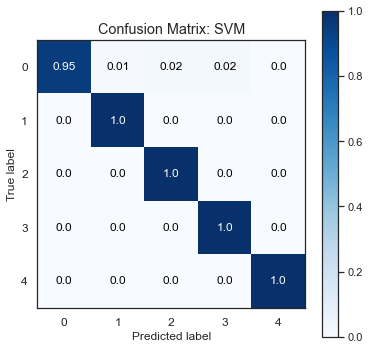

In [94]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=True,
                                    cmap='Blues')
plt.show()

#### 5. Logistic Regression(Model1)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)

C:\Users\athul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test,Y_pred)
acc

0.9097744360902256

In [97]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       106
           1       0.95      0.92      0.93       106
           2       0.80      0.86      0.83       106
           3       0.92      0.82      0.87       107
           4       0.99      1.00      1.00       107

    accuracy                           0.91       532
   macro avg       0.91      0.91      0.91       532
weighted avg       0.91      0.91      0.91       532



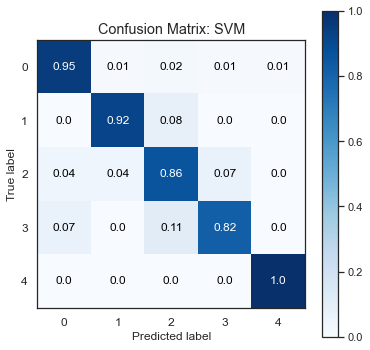

In [98]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(6,6), 
                                    title='Confusion Matrix: SVM',
                                    normalize=True,
                                    cmap='Blues')
plt.show()

### Regression Models

#### Linear Regression (Model1)

In [99]:
from sklearn.linear_model import LinearRegression

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['CREA']
X = df[['Age', 'Sex', 'category']]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=52)

linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression()

In [100]:
from sklearn.metrics import r2_score

Y_pred = linear.predict(X_test)
score = r2_score(Y_test, Y_pred)
score

0.27285523932471223

In [101]:
print("The linear model is: Y = ",linear.intercept_, "+", linear.coef_[0], "X1 + ", linear.coef_[1], "X2 + ", linear.coef_[2], "X3")

The linear model is: Y =  70.77934074280283 + -0.011260691654346058 X1 +  15.042858148318977 X2 +  -5.721602677490149 X3


In [102]:
# KFold cross validation
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(linear, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([0.33690404, 0.05109544, 0.35084828, 0.40717718, 0.18269247,
       0.27461192, 0.07991234, 0.23845648, 0.52623569, 0.2541711 ])

#### SVR (Model1)

In [103]:
from sklearn.model_selection import train_test_split

import pandas as pd
from imblearn.over_sampling import SMOTE

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category']
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']]

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)


In [104]:
from sklearn.svm import SVR

sv_regressor = SVR(kernel='linear', degree=3)

sv_regressor.fit(X_train,Y_train)
Y_pred = sv_regressor.predict(X_test)
Y_pred[:10]

array([ 1.67950523,  2.31524868,  1.10915748, -0.0639416 ,  1.95720136,
        0.98939607,  2.63425701,  3.6400287 ,  3.79639221,  2.3461906 ])

In [105]:
# class to convert regression values to Class
def reg_to_class(val):
    cc = 0
    if val<=0.5:
        cc = 0
    elif val<=1.5 and val>0.5:
        cc = 1
    elif val<=2.5 and val>1.5:
        cc = 2
    elif val<=3.5 and val>2.5:
        cc = 3
    else:
        cc = 4
    return cc

In [106]:
pred = []

for i in Y_pred:
    pred.append(reg_to_class(i))
 
pred[:10]

[2, 2, 1, 0, 2, 1, 3, 4, 4, 2]

In [107]:
print(sv_regressor.score(X_test, Y_test))

0.5808632799289852


In [108]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(sv_regressor, X_train, Y_train, scoring='r2', cv=folds)
scores 

array([0.50555549, 0.48480191, 0.5425871 , 0.50872056, 0.54500515,
       0.54517047, 0.48240305, 0.59030217, 0.57416951, 0.52922106])

### ROC Tests

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [110]:
log_model = LogisticRegression()
nb_model = GaussianNB()
svc_model = SVC()
des_model = DecisionTreeClassifier(class_weight=None, criterion="gini", 
                       max_depth=6, min_samples_leaf=0.1,
                       min_samples_split=0.1)

In [111]:
# Multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Read csv file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/toshihiroryuu/Machine_learning/master/ML_004_Hepatitis/processed_unscaled_data.csv')

Y = df['category'].to_numpy()
X = df[['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].to_numpy()

X_smote,Y_smote = SMOTE().fit_sample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, stratify = Y_smote, test_size=0.2, random_state=52)

label_dict = {0: 'Blood donor',1 :'Cirrhosis', 2: 'Fibrosis', 3 :'Hepatits', 4 : 'Suspect Blood Donor'}

def find_roc(classifier):
    # fit model
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 5

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, pred_prob[:,i], pos_label=i)
        roc_auc  = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], linestyle='--', label='%s ROC (area = %0.2f)' % (label_dict[i], roc_auc))

    plt.title(str(classifier) + ' Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

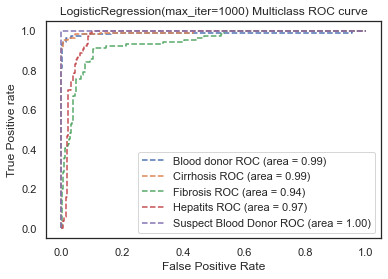

In [112]:
# Logistic Regression
log_model.max_iter=1000
find_roc(log_model)

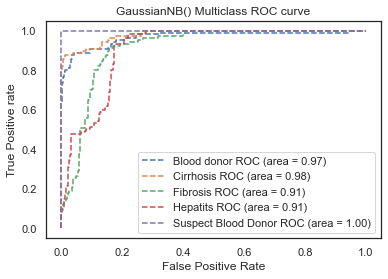

In [113]:
# Naive Bayes Model
find_roc(nb_model)

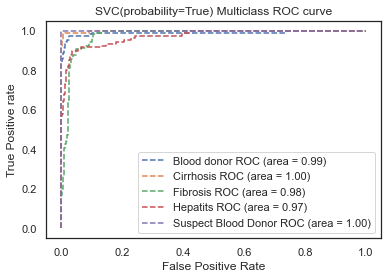

In [114]:
# SVC Model
svc_model = SVC()
svc_model.probability = True
find_roc(svc_model)

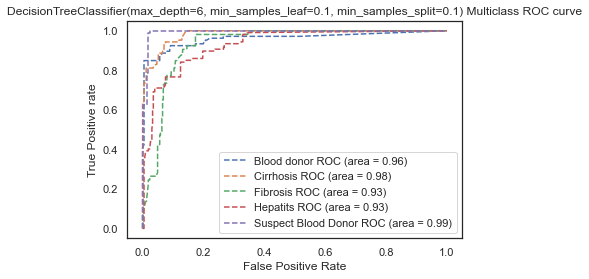

In [115]:
# Decision Tree
find_roc(des_model)

#### Gradio UI (User Interface)

In [116]:
# !pip install gradio

In [117]:
def convert(opt):
    if opt==0:
        strr = "Blood Donor"
    elif opt == 1:
        strr= "Cirrhosis"
    elif opt == 2:
        strr = "Fibrosis"
    elif opt == 3:
        strr = "Hepatitis"
    else:
        strr = "Suspected Blood Donor"
    return strr

In [118]:
import gradio as gr

import pandas as pd

def gpredict(Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT):
    
    if Sex == "Male":
        Sex = 1
    else:
        Sex = 0
        
    test = [[Age, Sex, ALB, ALP, ALT, AST, BIL, CHE, CHOL, CREA, GGT, PROT]]
    test = pd.DataFrame(test, columns =['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'], dtype = float)

    opt1 = int(svm_model.predict(test))
    opt2 = int(classifier.predict(test))
    opt3 = int(modelnb2.predict(test))
    opt4 = int(modeldt2.predict(test))
    opt5 = int(log_reg.predict(test))
    
    listt = [opt1, opt2, opt3, opt4, opt5]
    
    opt = max(set(listt), key=listt.count)
 
    return convert(opt1), convert(opt2), convert(opt3), convert(opt4), convert(opt5), convert(opt)


In [119]:
iface = gr.Interface(
  fn=gpredict, 
    
  inputs=[gr.inputs.Slider(0, 80, default=42), gr.inputs.Radio(['female', 'male'], label="Sex"), 
          gr.inputs.Slider(0, 70), gr.inputs.Slider(0, 210),
          gr.inputs.Slider(0, 330), gr.inputs.Slider(0, 190),
          gr.inputs.Slider(0, 100), gr.inputs.Slider(0, 18),
          gr.inputs.Slider(0, 10), gr.inputs.Slider(0, 160),
          gr.inputs.Slider(0, 300), gr.inputs.Slider(0, 90)],
    
  outputs=[gr.outputs.Textbox(label="SVM (98%)"), 
           gr.outputs.Textbox(label="KNN (97%)"), 
           gr.outputs.Textbox(label="Naive Bayes (87%)"), 
           gr.outputs.Textbox(label="Decision Tree (96%)"),
           gr.outputs.Textbox(label="Logistic Regression (94%)"),
           gr.outputs.Textbox(label="Final Result")],

  live=True)

iface.launch()

Running locally at: http://127.0.0.1:7860/
To get a public link for a hosted model, set Share=True
Interface loading below...


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)